# Exercício

### Função polinomial
$$ p(x) = 2x^2 - x^3 $$

### Função exponencial

$$ e(x) = 3e^{-2x}$$

### Função senoidal

$$ s(x) = 1+2\sin(2x)$$

In [56]:
import numpy as np

# REGRA DO TRAPEZIO
def trapezio(x, f):
  h = x[1] - x[0]
  baseMedia = (f(x[0])+f(x[1]))/2
  y = h * baseMedia
  return y

# Função Polinomil p(x)
p = lambda x: 3 + x + 2*x**2 + 3*x**3
xP = np.arange(-1, 1.1, 0.5)

# Função Exponencial e(x)
e = lambda x: 3*np.exp(-2*x) 
xE = np.arange(0, 2.5, 0.5)

# Função Senoidal s(x)
s = lambda x: 1+2*np.sin(2*x)
xS = np.arange(-1, 1.5, 0.5)

print('Pontos X da polinomial: ', xP)
print('Pontos X da exponencial: ', xE)
print('Pontos X da senoidal: ', xS)

Pontos X da polinomial:  [-1.  -0.5  0.   0.5  1. ]
Pontos X da exponencial:  [0.  0.5 1.  1.5 2. ]
Pontos X da senoidal:  [-1.  -0.5  0.   0.5  1. ]


# Obtendo as integrais aproxiamadas nos pontos

In [57]:
def getIntegralOnThePoints(Xs:list, f):
    Ys = []
    for x in Xs:
        a = x - 10**(-5)
        b = x + 10**(-5)
        # print(a, b)
        Ys.append(trapezio([a,b], f))
    return Ys

yP = getIntegralOnThePoints(xP, p)
yE = getIntegralOnThePoints(xE, e)
yS = getIntegralOnThePoints(xS, s)

print('Pontos Y da polinomial: ',yP)
print('Pontos Y da exponencial: ', yE)
print('Pontos Y da senoidal: ', yS)

Pontos Y da polinomial:  [1.9999999986020004e-05, 5.2499999994906786e-05, 6.0000000004e-05, 8.750000001284462e-05, 0.00018000000002218002]
Pontos Y da exponencial:  [6.0000000012000005e-05, 2.2072766474661905e-05, 8.120116995828905e-06, 2.987224102688851e-06, 1.098938333551038e-06]
Pontos Y da senoidal:  [-1.637189706576926e-05, -1.365883938555984e-05, 2e-05, 5.365883938548883e-05, 5.637189706580926e-05]


In [58]:
import matplotlib.pyplot as plt
import math

class MQ:

  def __init__(self):
    self.alfas = []

  def fit(self, X, Y, G):
    self.alfas = []
    self.G = G

    B = []
    A = []
    j = 0
    for g_lin in G:
      b = 0
      for i in range(0, len(X)):
        b += g_lin(X[i]) * Y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a = 0
        for i in range(0, len(X)):
          a += g_lin(X[i]) * g_col(X[i])
        A[j].append(a)
      j += 1
    self.alfas = np.linalg.solve(A, B)
    # print("A:",A)
    # print("alfas:", self.alfas)
    # print("B:",B)

  def calc(self, x):
    s = 0
    for i in range(0, len(self.G)):
      s += self.alfas[i] * self.G[i](x)
    return s

  def calc_exp(self, x):
    return math.e**self.alfas[0] * (math.e**(-(-self.alfas[1]) * x))
                  #a1                           #a2

  def calc_hiperbole(self, x):
    return 1/(self.alfas[0] + (self.alfas[1]*x))

  def calc_seno(self, x):
    return self.alfas[0] + self.alfas[1] * np.sin(2*x)

# Snippet do Código do Ajuste de Curva

In [59]:
import matplotlib.pyplot as plt
import math

class MQ:

  def __init__(self):
    self.alfas = []

  def fit(self, X, Y, G):
    self.alfas = []
    self.G = G

    B = []
    A = []
    j = 0
    for g_lin in G:
      b = 0
      for i in range(0, len(X)):
        b += g_lin(X[i]) * Y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a = 0
        for i in range(0, len(X)):
          a += g_lin(X[i]) * g_col(X[i])
        A[j].append(a)
      j += 1
    self.alfas = np.linalg.solve(A, B)
    # print("A:",A)
    # print("alfas:", self.alfas)
    # print("B:",B)

  def calc(self, x):
    s = 0
    for i in range(0, len(self.G)):
      s += self.alfas[i] * self.G[i](x)
    return s

  def calc_exp(self, x):
    return math.e**self.alfas[0] * (math.e**(-(-self.alfas[1]) * x))
                  #a1                           #a2

  def calc_hiperbole(self, x):
    return 1/(self.alfas[0] + (self.alfas[1]*x))

  def calc_seno(self, x):
    return self.alfas[0] + self.alfas[1] * np.sin(2*x)

# Plotando os gráficos das integrais de cada função 

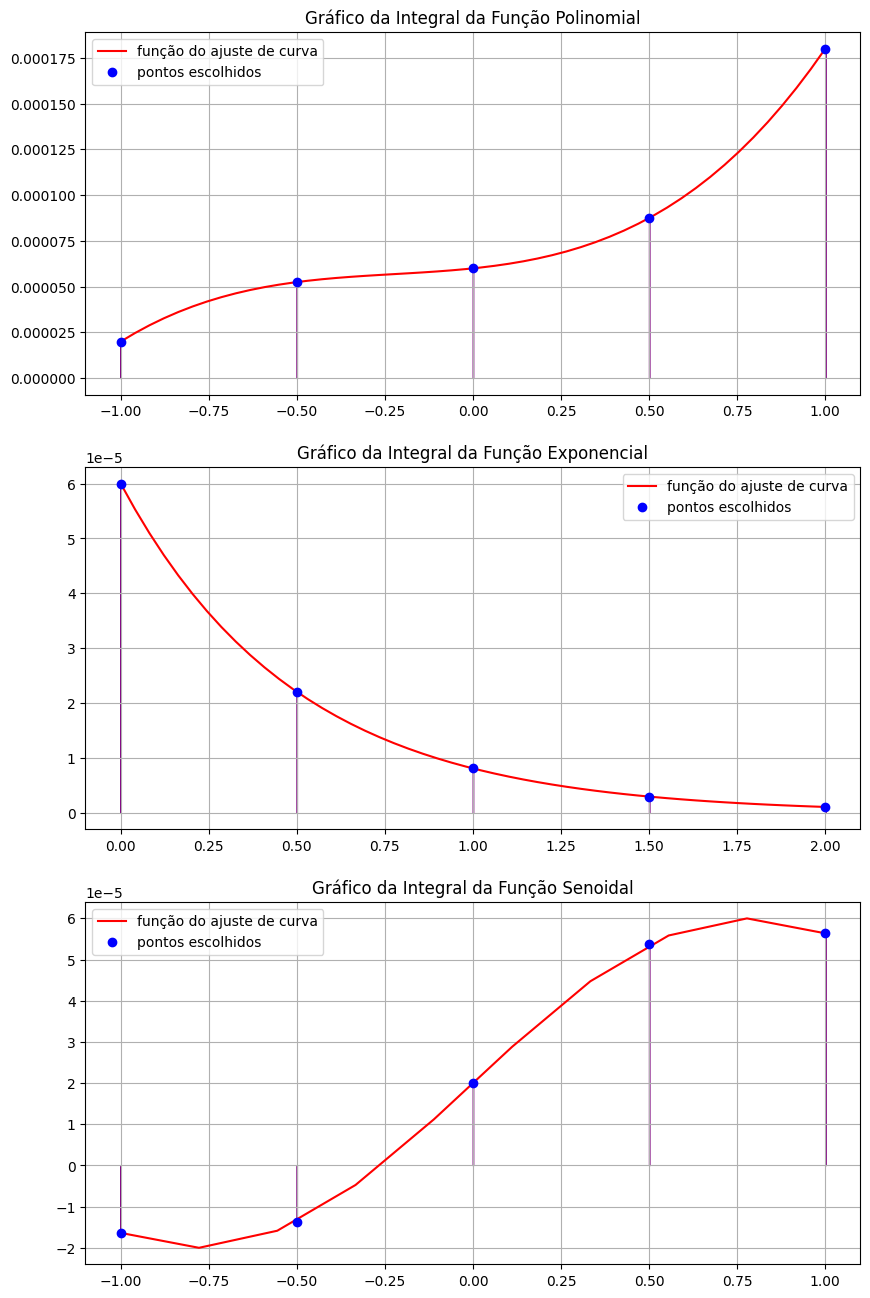

In [60]:
# Definindo a função da integral aproximada para qualquer ponto na função polinomial
mq = MQ()
xPOriginal = np.linspace(min(xP), max(xP), 50)
yPOriginal = [ e(x) for x in xPOriginal] 
mq.fit(xP, yP, [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: x**3])
xP_line = np.linspace(min(xP), max(xP), 50)
yP_line = list(map(lambda x: mq.calc(x), xP_line))

#plotando
fig = plt.figure(figsize=(10,16))
fig.add_subplot(311)
plt.plot(xP_line, yP_line, 'r-', label="função do ajuste de curva")
plt.plot(xP, yP, 'bo', label="pontos escolhidos")

for i in range(len(xP)):
  x0 = xP[i] - 10**(-5)
  x1 = xP[i] + 10**(-5)
  y0 = mq.calc(x0)
  y1 = mq.calc(x1)
  plt.fill_between([x0,x1], [y0,y1], color='purple', alpha=1)

plt.title("Gráfico da Integral da Função Polinomial")
plt.legend()
plt.grid()

# Definindo a função da integral aproximada para qualquer ponto na função exponencial
mq = MQ()
xEOriginal = np.linspace(min(xE), max(xE), 50)
yEOriginal = [ e(x) for x in xEOriginal] 
yELog = [np.log(y) for y in yE]
mq.fit(xE, yELog, [lambda x: 1, lambda x: x])
xE_line = np.linspace(min(xE), max(xE), 50)
yE_line = list(map(lambda x: mq.calc_exp(x), xE_line))

# plotando:
fig.add_subplot(312)
plt.plot(xE_line, yE_line, 'r-', label="função do ajuste de curva")
plt.plot(xE, yE, 'bo', label="pontos escolhidos")

for i in range(len(xE)):
  x0 = xE[i] - 10**(-5)
  x1 = xE[i] + 10**(-5)
  y0 = mq.calc_exp(x0)
  y1 = mq.calc_exp(x1)
  plt.fill_between([x0,x1], [y0,y1], color='purple', alpha=1)

plt.title("Gráfico da Integral da Função Exponencial")
plt.legend()
plt.grid()


# Definindo a função da integral aproximada para qualquer ponto na função senoidal
mq = MQ()
xSOriginal = np.linspace(min(xS), max(xS), 50)
ySOriginal = [ s(x) for x in xSOriginal] 
mq.fit(xS, yS, [lambda x: 1, lambda x: np.sin(2*x)])
xS_line = np.linspace(min(xS), max(xS), 10)
yS_line = list(map(lambda x: mq.calc_seno(x), xS_line))

# plotando
fig.add_subplot(313)
plt.plot(xS_line, yS_line, 'r-', label="função do ajuste de curva")
plt.plot(xS, yS, 'bo', label="pontos escolhidos")

for i in range(len(xS)):
  x0 = xS[i] - 10**(-5)
  x1 = xS[i] + 10**(-5)
  y0 = mq.calc_seno(x0)
  y1 = mq.calc_seno(x1)
  plt.fill_between([x0,x1], [y0,y1], color='purple', alpha=1)

plt.title("Gráfico da Integral da Função Senoidal")
plt.legend()
plt.grid()
plt.show()